# NAC 1 - Gustavo Gomes Da Silva Fileto - RM 81208 / Vinicius Paes Moura - RM 82974

# R1

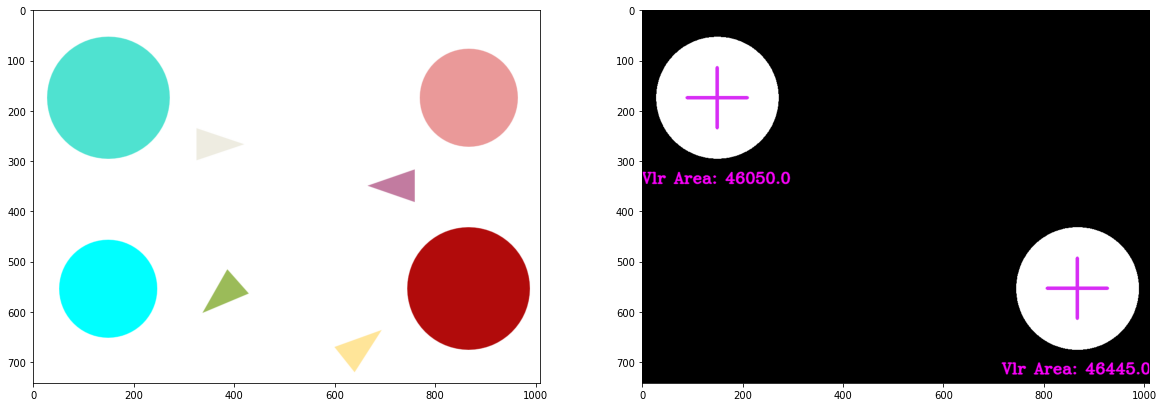

In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

def CentroArea(mask):
  borda, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

  circ_grande = None
  circ_pequeno = None
  area_pequena = cv2.contourArea(borda[0])
  area_grande = 0

  for a in borda:
    area = cv2.contourArea(a)
    if area <= area_pequena:
      area_pequena = area
      circ_pequeno = a

  for b in borda:
      area = cv2.contourArea(b)
      if area > area_grande:
          area_grande = area
          circ_grande = b
  mask = cv2.fillPoly(mask_rgb, [circ_pequeno], 0)
  
  xpto = cv2.moments(circ_grande)
  if xpto["m00"] != 0:
    x = int(xpto["m10"] / xpto["m00"])
    y = int(xpto["m01"] / xpto["m00"])

  tamanho_org = 60
  color = (215, 44, 245)
  cv2.line(mask,(x - tamanho_org,y),(x + tamanho_org,y),color,5)
  cv2.line(mask,(x,y - tamanho_org),(x, y + tamanho_org),color,5)

  letra_fonte = cv2.FONT_HERSHEY_COMPLEX
  cv2.putText(mask, f'Vlr Area: {str(area_grande)}', (x-150,y+170), letra_fonte,1,(250, 0, 250),2,cv2.LINE_AA) 

  return mask

img = cv2.imread("img_circulo_nac1.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

vermelho_lower_hsv = np.array([0, 80, 85])
vermelho_upper_hsv = np.array([15, 255, 255])

azul_lower_hsv = np.array([85, 100, 100]) 
azul_upper_hsv = np.array([100, 255, 255])

vermelho_mask = cv2.inRange(img_hsv, vermelho_lower_hsv, vermelho_upper_hsv)
azul_mask = cv2.inRange(img_hsv, azul_lower_hsv, azul_upper_hsv)

mask_vermelho = CentroArea(vermelho_mask)
mask_azul = CentroArea(azul_mask)

mask_final = cv2.bitwise_or(mask_vermelho, mask_azul) 

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb, vmin=0, vmax=255); 
plt.subplot(1, 2, 2)
plt.imshow(mask_final, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

# R2

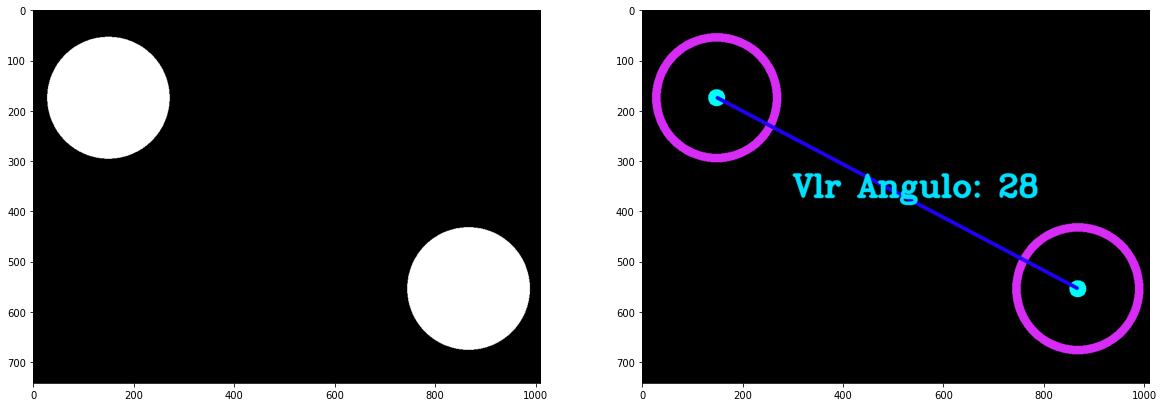

In [12]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

def CentroArea(mask):
  borda, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

  circ_grande = None
  circ_pequeno = None
  area_pequena = cv2.contourArea(borda[0])
  area_grande = 0

  for a in borda:
    area = cv2.contourArea(a)
    if area <= area_pequena:
      area_pequena = area
      circ_pequeno = a

  for b in borda:
      area = cv2.contourArea(b)
      if area > area_grande:
          area_grande = area
          circ_grande = b
  mask = cv2.fillPoly(mask_rgb, [circ_pequeno], 0)

  hough_mask = mask.copy()
  
  xpto = cv2.moments(circ_grande)
  if xpto["m00"] != 0:
    x = int(xpto["m10"] / xpto["m00"])
    y = int(xpto["m01"] / xpto["m00"])

  tamanho_org = 60
  color = (215, 44, 245)
  cv2.line(mask,(x - tamanho_org,y),(x + tamanho_org,y),color,5)
  cv2.line(mask,(x,y - tamanho_org),(x, y + tamanho_org),color,5)

  letra_fonte = cv2.FONT_HERSHEY_COMPLEX
  cv2.putText(mask, f'Vlr Area: {str(area_grande)}', (x-150,y+170), letra_fonte,1,(250, 0, 250),2,cv2.LINE_AA) 

  return mask, hough_mask, x,y

img = cv2.imread("img_circulo_nac1.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

vermelho_lower_hsv = np.array([0, 80, 85])
vermelho_upper_hsv = np.array([15, 255, 255])

azul_lower_hsv = np.array([85, 100, 100]) 
azul_upper_hsv = np.array([100, 255, 255])

vermelho_mask = cv2.inRange(img_hsv, vermelho_lower_hsv, vermelho_upper_hsv)
azul_mask = cv2.inRange(img_hsv, azul_lower_hsv, azul_upper_hsv)

mask_vermelho, hough_mask_red, cx_red, cy_red = CentroArea(vermelho_mask)
mask_azul, hough_mask_blue, cx_blue, cy_blue= CentroArea(azul_mask)

hough_mask = cv2.bitwise_or(hough_mask_red, hough_mask_blue)

img = cv2.cvtColor(hough_mask, cv2.COLOR_BGR2GRAY)
arestas = cv2.Canny(img,50,150)
circulo = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,60,param1=30,param2=20,minRadius=1,maxRadius=0)
bordas_rgb = cv2.cvtColor(arestas, cv2.COLOR_GRAY2RGB)
saida = bordas_rgb

if circulo is not None:        
    circulo = np.uint16(np.around(circulo))
    for i in circulo[0,:]:
        cv2.circle(saida,(i[0],i[1]),i[2],(215, 44, 245),15)
        cv2.circle(saida,(i[0],i[1]),2,(0, 255, 251),30)

cv2.line(saida, (cx_red, cy_red),(cx_blue, cy_blue), (33, 0, 250), thickness=5, lineType=30)   

calc_final = round(math.degrees(math.atan2(cy_red-cy_blue, cx_red-cx_blue))) 

letra_fonte_r2 = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(saida, f'Vlr Angulo: {str(calc_final)}', (300,370), letra_fonte_r2,2,(0, 225, 255),5,cv2.LINE_AA) 

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(hough_mask, vmin=0, vmax=255); 
plt.subplot(1, 2, 2)
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)
plt.show()